# $K$-nearest neighbors classification

```{admonition} Read then Launch
This content is best viewed in html because jupyter notebook cannot display some content (e.g. figures, equations) properly. You should finish reading this page first and then launch it as an interactive notebook in Google Colab (faster, Google account needed) or Binder by clicking the rocket symbol (<i class="fas fa-rocket"></i>) at the top.
```

Before we end this introduction, let us look at a simple example of a supervised machine learning model, the $K$-Nearest Neighbors ($K$-NN) model. It is a _non-parametric_ method used for classification and regression. In both cases, the input consists of the $K$ closest training examples in the feature space. The output depends on whether $K$-NN is used for classification or regression. Here, we focus on the classification case.

Watch the 5-minute video below for a visual explanation of the $K$-NN algorithm.

```{admonition} Video
<iframe width="700" height="394" src="https://www.youtube.com/embed/HVXime0nQeI?start=21&end=305" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

[Explaining $K$-Nearest Neighbors by StatQuest](https://www.youtube.com/embed/HVXime0nQeI?start=21&end=305), embedded according to [YouTube's Terms of Service](https://www.youtube.com/static?gl=CA&template=terms).
```

Then study the following sections to learn more about $K$-NN.

## Ingredients & transparency
For all machine learning models covered in this course, we aim to talk about their ingredients and transparency in a standard way to facilitate understanding their similarities and differences. For transparency, we will focus on the system transparency, i.e. system logic. Process transparency is not specific to ML models and it will be discussed when we cover the ML process/lifecycle.

The ingredients of a $K$-NN model are the training data. The transparency of a $K$-NN model is the distance between the test point and the training points.

```{admonition} Ingredients
- Input: features of data samples
- Output: class labels of data samples
- Model: assigned dominant class label of the $K$ nearest neighbors (in training data) of a test sample to it
  - Hyperparameter(s): the number of nearest neighbors $K$
  - Parameters: nonparametric (i.e., no parameters to learn, only store the training data)
- Loss function: minimise distance between samples
- Learning algorithm: sorting distances between samples
```

```{admonition} System transparency
System logic
- Condition to produce certain output: to produce a sample with label $c$, find a data point in the input space where the majority of its nearest neighbors have label $c$
```

## Example: iris classification

We adapt the [$K$-NN example from scikit-learn](https://scikit-learn.org/1.0/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py) to illustrate the use of $K$-NN for classification.

To do so, we use the Iris dataset, which is a classic dataset in machine learning and statistics. It is included in scikit-learn and we load it as follows.

### Import libraries

Get ready by importing the application programming interfaces (APIs) needed from respective libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

### Load data

 Let us work on one of the classical dataset in machine learning: the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). It can be loaded directly from the `scikit-learn library`. You can also click [Iris](https://github.com/pykale/transparentML/blob/main/data/Iris.csv) to view the dataset directly in your browser.

In [3]:
iris = datasets.load_iris()

### Visualisation in 2D

For the purpose of visualisation to get intuition, we will work with the first two features only so that we can do visualisation of the data samples in a 2D plot. We can take the first two features by [indexing and slicing](https://pykale.github.io/transparentML/00-prereq/basic-python.html#indexing-and-slicing) as below.

In [4]:
X = iris.data[:, :2]
y = iris.target

Let us visualise the data samples in a 2D plot below using the `scatter` function from the `matplotlib.pyplot` library. This is useful for getting intuition about the data. The colour of each data point corresponds to its label.

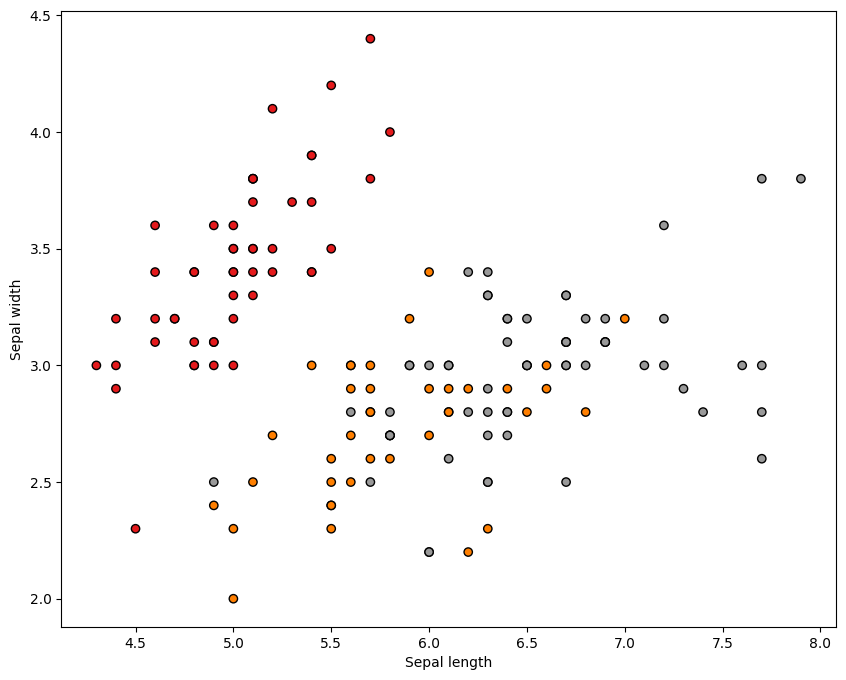

In [5]:
plt.figure(figsize=(10, 8))
plt.scatter(
    iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor="k"
)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

Set up the [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) for visualisation.

In [6]:
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

### Hyperparameter tuning

In the $K$-NN model, there is only one hyperparameter, the number of neighbors $K$, which is `n_neighbors` in `scikit-learn`. We set it to 15. In the following, we will study the effect of this hyperparameter on the model performance by examining five different values of $K$.

### Training and testing

We create an instance of the $K$-NN Classifier with each of the five $K$ values and fit the data. Then we make prediction of class labels on values from the grid, all/most of them are not seen in the training. We store the prediction results with different colours for different classes to visualise the decision boundaries.

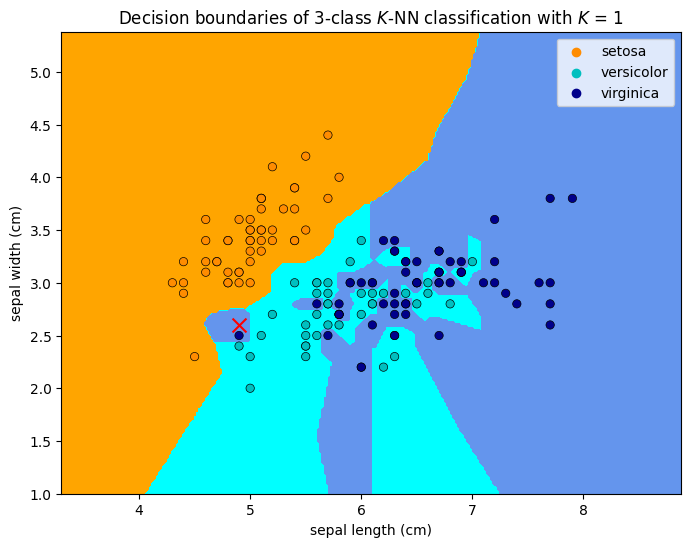

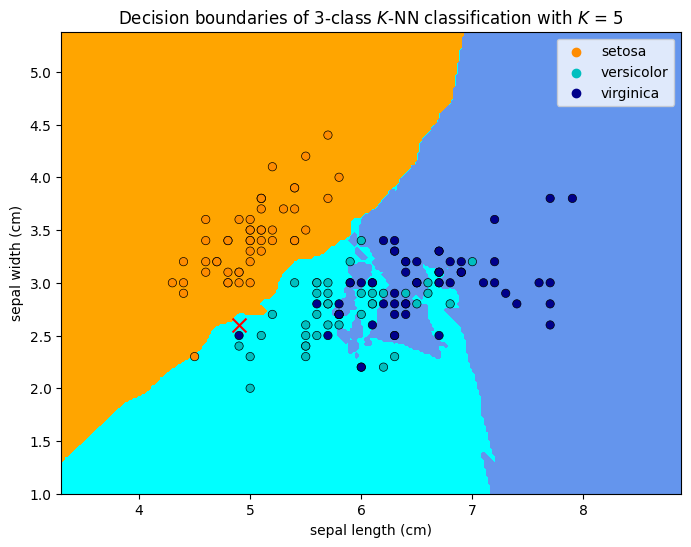

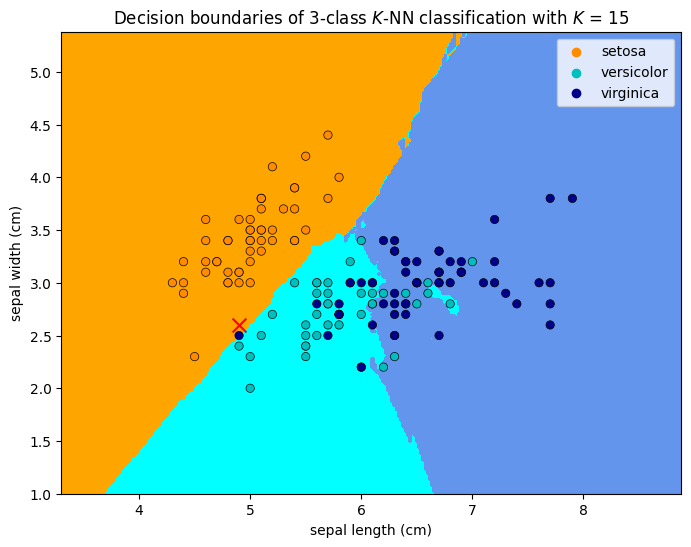

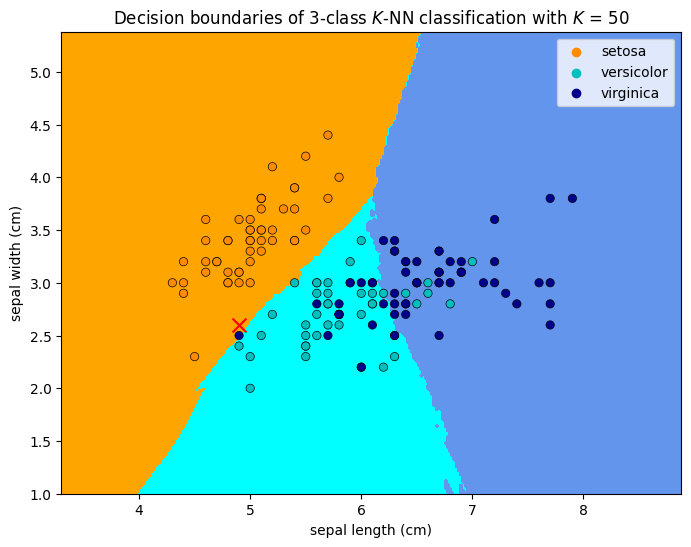

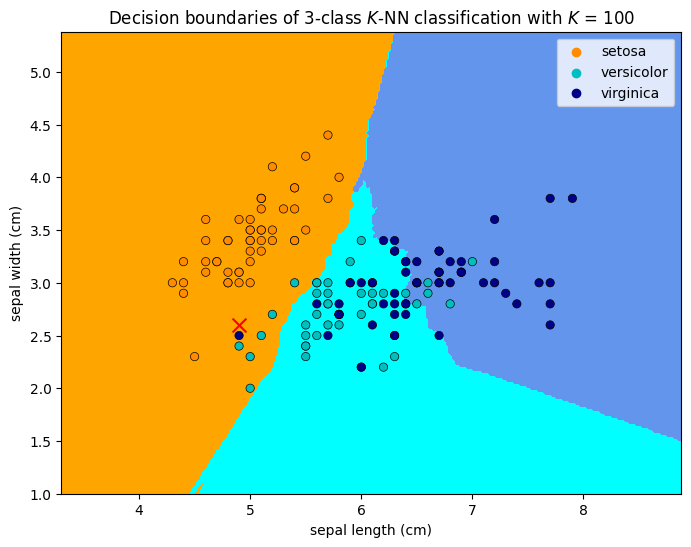

In [7]:
for n_neighbors in [1, 5, 15, 50, 100]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

    # Add an example data point for insights
    plt.scatter(4.9, 2.6, marker="x", color="red", s=100)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "Decision boundaries of 3-class $K$-NN classification with $K$ = %i"
        % (n_neighbors)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

### Example explanation of system transparency

In the above, we highlighted an example test data point at `septal_length = 4.9cm` and `septal_width = 2.6cm`, marked as a red cross in the figures. Let us examine the system logic with $K=1$ to reveal its system transparency.

```{admonition} System transparency
:class: important
- The model predicts the test point (at the red cross) to be a `virginica` because the nearest neighbour to the red cross is a darkblue circle, which is a `virginica`.
- The model would have predict the test point to be a `versicolor` if its `septal_length` is `5.1cm`, or The model would have predicted the test point to be a `setosa` if its `septal_width` is `2.9cm`.
```    

When $K=5$, the model predicts the test point to be a `versicolor` because the majority of the five nearest neighbors to the red cross are `versicolor` (green circles). When $K=15$, the model predicts the test point to be a `setosa` because the majority of the 15 nearest neighbors to the red cross are `setosa` (orange circles). From the figures, we can tell how a different prediction would have been made by changing the features of the test point.

### Other observations

We can make the following observations from the above figures.

- We can see that the decision boundaries are not smooth. This is because the $K$-NN model is a non-parametric model, which means that it does not make any assumption on the underlying data distribution. This is also the reason why the model is called _lazy_. $K$-NN actually does not learn a discriminative function from the training data but memorises the training dataset instead. This is why the model is also called _instance-based_. The model makes prediction by comparing the test sample with all training samples and assigning the label that is most common among its $K$ nearest neighbors.
- $K$-NN is fully transparent in the sense that it is easy to understand the logic behind the model and we can answer the question of for what values of the input variables would the system return a specific value of interest. However, it is not efficient in terms of computational cost. The computational cost of $K$-NN is $O(n)$, where $n$ is the number of training samples. This is because the model needs to compute the distance between the test sample and all training samples. This is also the reason why $K$-NN is not suitable for large datasets.
- **Bias-variance trade-off**: When $K$ = 1, the decision boundary is _overly flexible_. This corresponds to a classifier that has _low bias_ but _very high variance_. As $K$ grows, the method becomes _less flexible_ and produces a decision boundary that is close to (piece-wise) linear. This corresponds to a _low-variance_ but _high-bias_ classifier. This trade-off is common in machine learning and we will discuss it in more details in the following sections. Typically, a $K$ neither too big (e.g. 100) nor too small (e.g. 1), such as $K=5$ will give the best performance. Choosing the correct level of flexibility (typically through _hyperparameter tuning_ after selecting a model) is critical to the success of any machine learning method.

Despite the fact that it is a very simple approach, $K$-NN can often produce classifiers with good performance. This is because the decision boundary is very flexible and can adapt to the data distribution. However, it is not suitable for large datasets because of its high computational cost.


## Exercises

**1**. How many **features** are there in total for the **iris** dataset?

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [8]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
print("The number of features of iris dataset is %d" % iris.data.shape[1])

The number of features of iris dataset is 4


**2**.  Why is $K$-NN a **lazy model**?

*Compare your answer with the solution below*

```{toggle}
$K$-NN is a lazy model beacuase it is a non-parametric model, which means that it does not make any assumption on the underlying data distribution.
```

**3**. Why is  KNN an **instance-based model**?
    
*Compare your answer with the solution below*
```{toggle}
$K$-NN does not learn a discriminative function from the training data but memorises the training dataset instead that is why it is called instance-based model.
```

**4**. The table below provides a training set containing **six observations**, **three predictors**, and **one qualitative** response variable.

```{list-table}
:header-rows: 1
:widths: "auto"
:name: KNNproblem-table
* - Observations
  - $X_1$
  - $X_2$
  - $X_3$
  - $Y$
* - 1
  - 0
  - 3
  - 0
  - Red
* - 2
  - 2
  - 0
  - 0
  - Red
* - 3
  - 0
  - 1
  - 3
  - Red
* - 4
  - 0
  - 1
  - 2
  - Green
* - 5
  - \-1
  - 0
  - 1
  - Green
* - 6
  - 1
  - \-1
  - 1
  - Red
```
Suppose we wish to use the data see to make a prediction for $Y$ when $X_1 = X_2 = X_3 = 1$ using **$K$-nearest** neighbors.
    
**a**. Compute the **Euclidean distance** between each **observation** and the **test point**,  $X_1 = X_2 = X_3 = 1$ .

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.DataFrame(
    {
        "Obs": [1, 2, 3, 4, 5, 6],
        "X1": [0, 2, 0, 0, -1, 1],
        "X2": [3, 0, 1, 1, 0, -1],
        "X3": [0, 0, 3, 2, 1, 1],
        "Y": ["Red", "Red", "Red", "Green", "Green", "Red"],
    }
)


def euclidian_dist(x):
    """Compute the row-wise euclidean distance
    from the origin"""
    return (np.sum((x - 1) ** 2, axis=1)) ** 0.5


euc_dist = pd.DataFrame({"EuclideanDist": euclidian_dist(df[["X1", "X2", "X3"]])})
df_euc = pd.concat([df, euc_dist], axis=1)
df_euc.reset_index(drop=True)

,Obs,X1,X2,X3,Y,EuclideanDist
0,1,0,3,0,Red,2.449490
1,2,2,0,0,Red,1.732051
2,3,0,1,3,Red,2.236068
3,4,0,1,2,Green,1.414214
4,5,-1,0,1,Green,2.236068
5,6,1,-1,1,Red,2.000000


**b**. What is our prediction with $K=1$? Why?

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [10]:
K = 1

df_euc.nsmallest(K, "EuclideanDist")

# Our prediction for K=1 is Green

,Obs,X1,X2,X3,Y,EuclideanDist
3,4,0,1,2,Green,1.414214


**c**. What is our prediction with $K=3$? Why?

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [11]:
K = 3

df_euc.nsmallest(K, "EuclideanDist")

# Our prediction for K=3 is Red, because majority of the 3 nearest neighbours are Red.

,Obs,X1,X2,X3,Y,EuclideanDist
3,4,0,1,2,Green,1.414214
1,2,2,0,0,Red,1.732051
5,6,1,-1,1,Red,2.000000


**d**. What is our prediction with $K=4$? Why?

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [12]:
K = 4

df_euc.nsmallest(K, "EuclideanDist")

# Our prediction for K=4 is Red, because majority of the 4 nearest neighbours are Red.

,Obs,X1,X2,X3,Y,EuclideanDist
3,4,0,1,2,Green,1.414214
1,2,2,0,0,Red,1.732051
5,6,1,-1,1,Red,2.000000
2,3,0,1,3,Red,2.236068
